In [1]:
from phi.flow import *

<Figure size 1200x500 with 1 Axes>

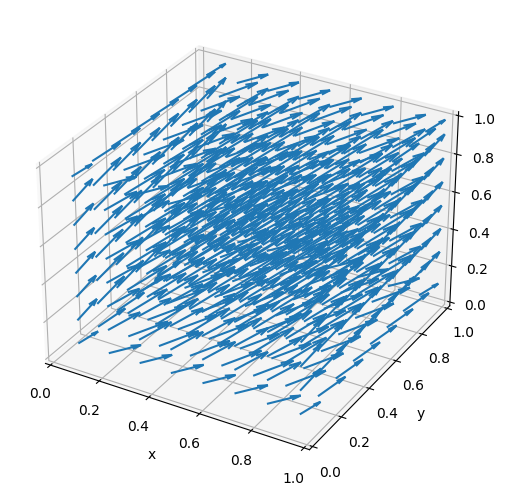

In [2]:
grid = StaggeredGrid([.1, .1, .1], 0, Box(x=1, y=1, z=1), batch(5), x=8, y=8, z=8)
# plot(grid.at_centers()['x'])
plot(grid)

<Figure size 1200x500 with 1 Axes>

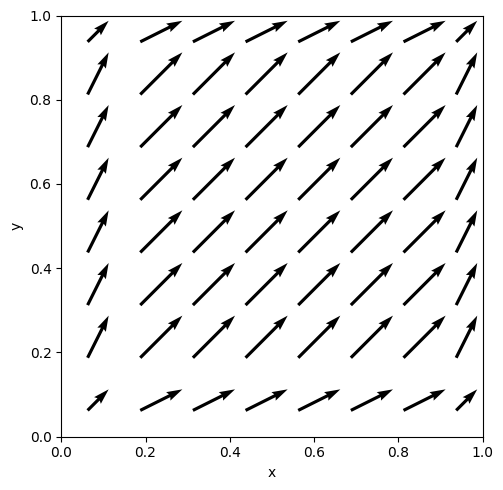

In [3]:
plot(grid.at_centers().z[0].vector[:2])

<Figure size 1200x500 with 2 Axes>

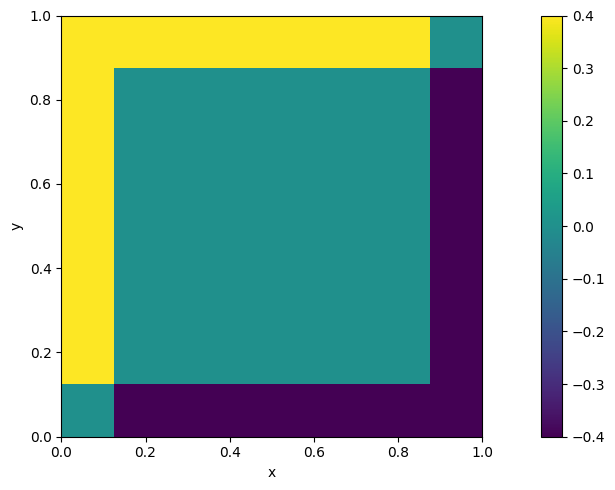

In [4]:
plot(field.curl(grid.at_centers().z[0].vector[:2]))

In [78]:
v0 = tensor([(1, 0), (2, 0)], batch("speed"), channel(vector='x,y'))
grid2 = StaggeredGrid(v0, extrapolation.BOUNDARY, Box(x=PI, y=PI), x=4, y=4)
grid2

StaggeredGrid[(speedᵇ=2, xˢ=4, yˢ=4, vectorᶜ=x,y), size=(x=3.142, y=3.142), extrapolation=boundary]

In [81]:
noise = Noise().at(grid2.speed[0])
grid2 + 2*noise

StaggeredGrid[(speedᵇ=2, xˢ=4, yˢ=4, vectorᶜ=x,y), size=(x=3.142, y=3.142), extrapolation=boundary]

In [74]:
grid2.speed[0].__setattr__("values", Noise().at(grid2.speed[0]).values)

AttributeError: can't set attribute 'data'

In [86]:
noise = tensor(math.random_normal(grid2))
noise

(speedᵇ=2, xˢ=4, yˢ=4, vectorᶜ=x,y) 0.069 ± 0.946 (-2e+00...3e+00)

In [89]:
def taylor_green_velocity(x):
    sin = math.sin(x)
    cos = math.cos(x)
    return stack({
        'x': sin.vector['x'] * cos.vector['y'] * cos.vector['z'],
        'y': -cos.vector['x'] * sin.vector['y'] * cos.vector['z'],
        'z': 0*sin.vector['z']},
        dim=channel('vector'))

n = 4
DOMAIN = dict(x=n, y=n, z=n, bounds=Box(x=2*PI, y=2*PI, z=2*PI), extrapolation=extrapolation.PERIODIC)

In [91]:
grid3 = StaggeredGrid(taylor_green_velocity, **DOMAIN)
grid3

StaggeredGrid[(xˢ=4, yˢ=4, zˢ=4, vectorᶜ=x,y,z), size=(x=6.283, y=6.283, z=6.283), extrapolation=periodic]

In [93]:
bat = tensor([grid3.values, grid3.values], batch("init"), channel(vector='x,y,z'))
bat

(initᵇ=2, xˢ=4, yˢ=4, zˢ=4, vectorᶜ=x,y,z) 0.00e+00 ± 2.9e-01 (-5e-01...5e-01)

StaggeredGrid[(initᵇ=2, xˢ=4, yˢ=4, zˢ=4, vectorᶜ=x,y,z), size=(x=6.283, y=6.283, z=6.283), extrapolation=periodic]


<Figure size 1200x500 with 2 Axes>

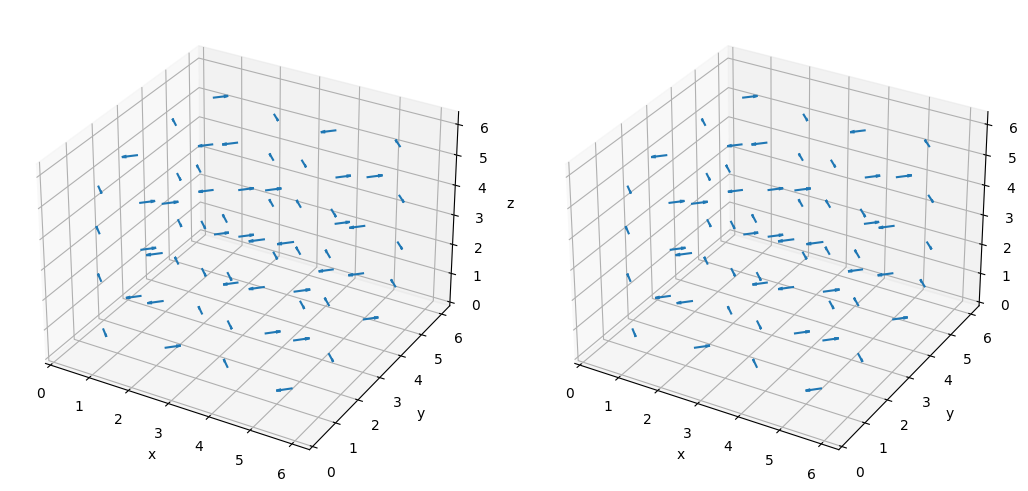

In [95]:
grid3 = StaggeredGrid(bat, **DOMAIN) 
print(grid3)
plot(grid3)